In [1]:
# importing libarires for Data manipulation
import numpy as np
import pandas as pd

# importing data visualization librarires 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#import libraries for scaling the data
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox

#import libraies for model building
from sklearn.cluster import KMeans

- Infromation like Objectives ,data insgihts ,and model related results are present in the below PPT
<br>

[PPT](https://docs.google.com/presentation/d/1x_V7lwpMnuRJ-1wbg_F4q38-QH0_2Fb8oTiXPEXjoZc/edit#slide=id.gb1a93e1f1c_0_6)

In [2]:
orginal_data = pd.read_csv("Wholesale customers data.csv") # reading the csv file to a dataframe

In [3]:
orginal_data.head() #checking if the data is loaded or not by viewing the first five records

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
orginal_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# from the statistical descripiton all the products have records with higger value. 
# Even the products have large variation between the mean and median , indicating that few customers
# have purchased higger quantity of products than usual (outliers)

In [6]:
orginal_data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

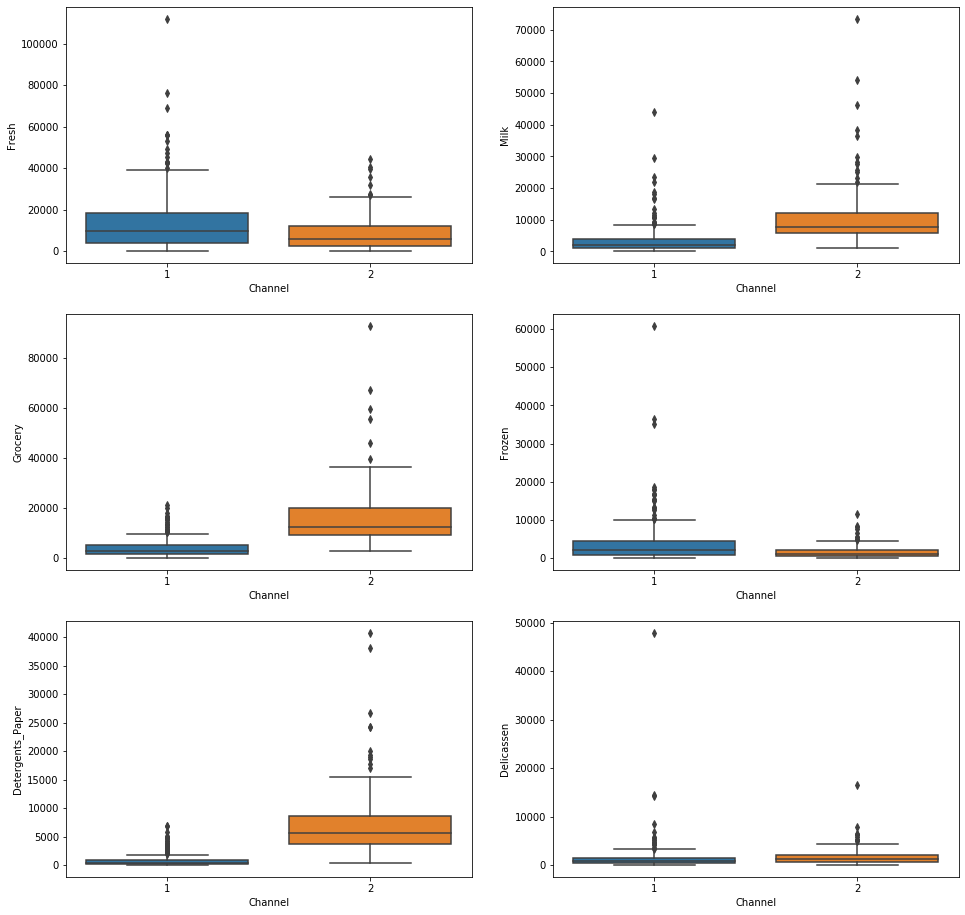

In [7]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(16,16))
for i in enumerate(products):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x='Channel',y = i[1],data = orginal_data)

In [8]:
#Fresh,Frozen has large amount of product in channel 1
#Milk,Grocery ,Detergent_paper has large amount of product in channel 2
#Dellicassen is almost same in both the channel

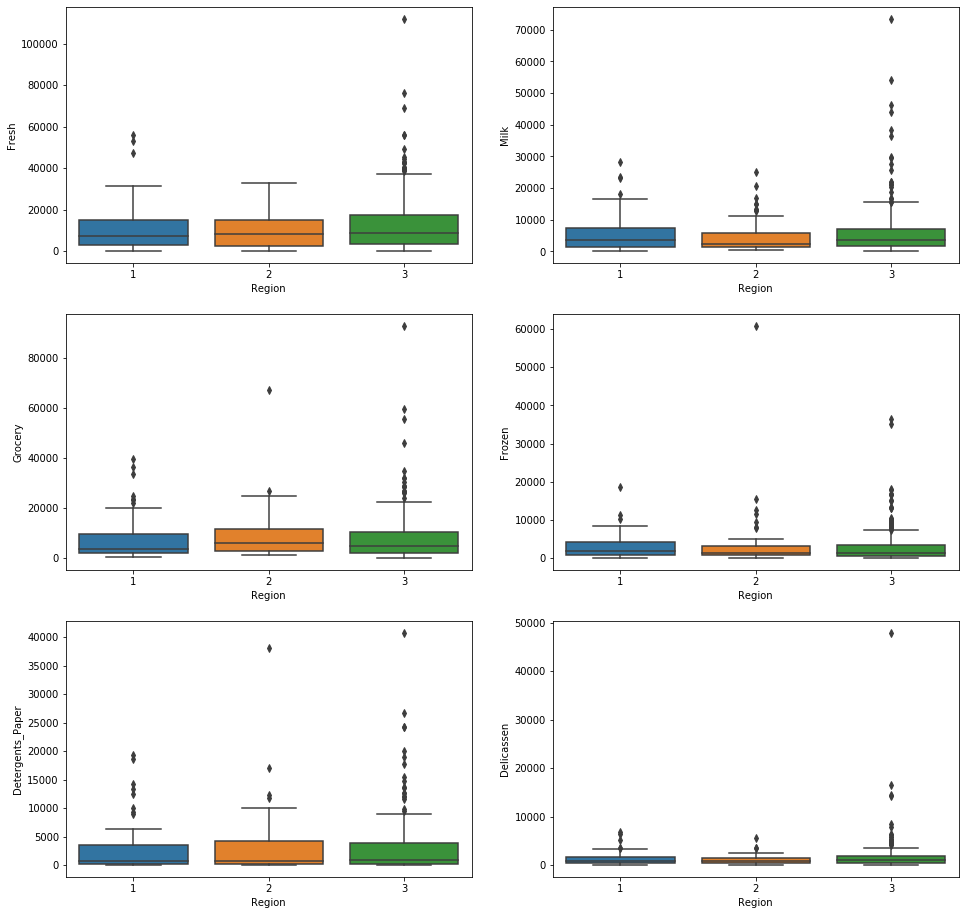

In [9]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(16,16))
for i in enumerate(products):
    plt.subplot(3,2,i[0]+1)
    sns.boxplot(x='Region',y = i[1],data = orginal_data)

In [10]:
#Fresh has same almost same amount of distribution over three regions
#Region 1 has most of them with grocery amount between 5000 to 10000

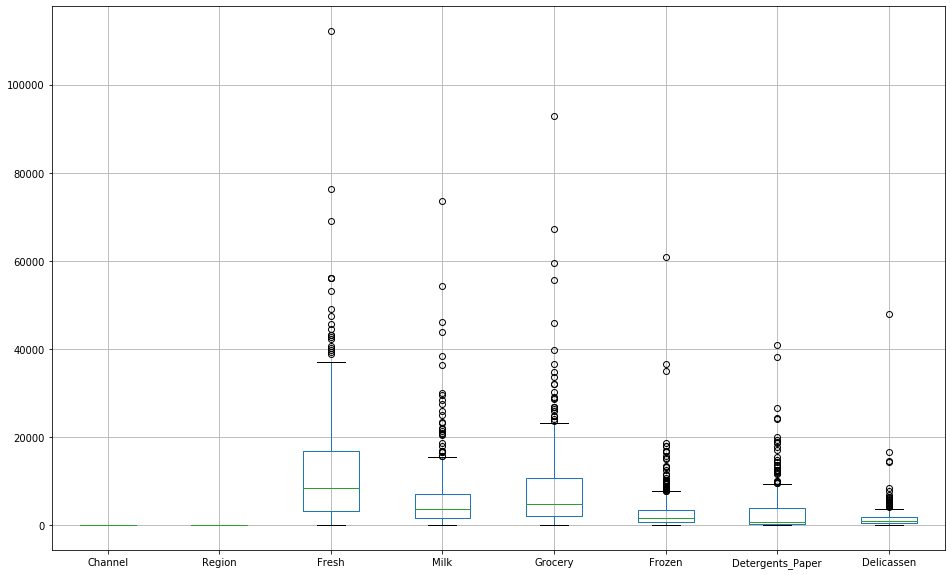

In [11]:
plt.figure(figsize=(16,10))
orginal_data.boxplot()

In [12]:
# Fresh and Grocery have high amount records
# Delicassen has very less price range than compared to other product

In [13]:
orginal_data[orginal_data['Fresh'] > 80000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550


In [14]:
orginal_data[orginal_data['Grocery'] > 80000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2,3,16117,46197,92780,1026,40827,2944


In [15]:
orginal_data[orginal_data['Fresh'] > 60000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
125,1,3,76237,3473,7102,16538,778,918
181,1,3,112151,29627,18148,16745,4948,8550
284,1,3,68951,4411,12609,8692,751,2406


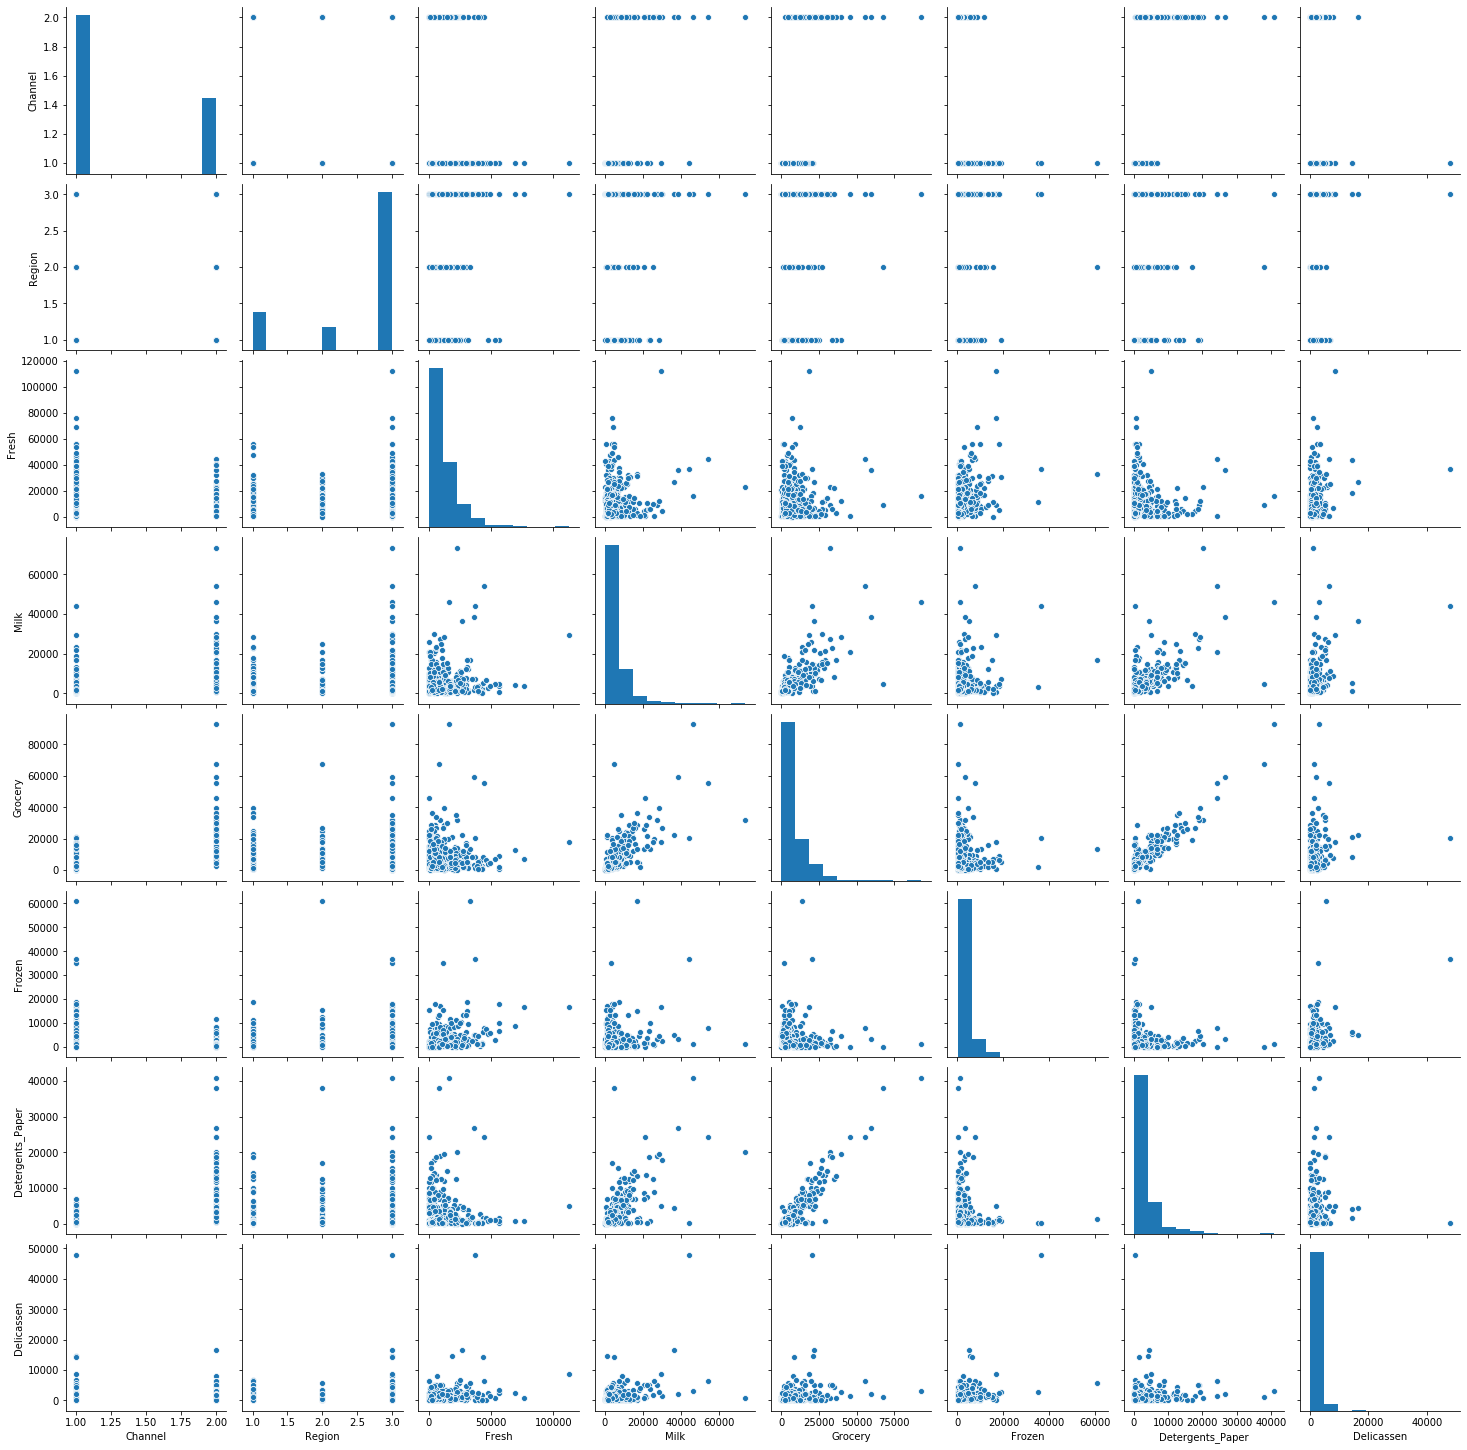

In [17]:
sns.pairplot(orginal_data)
# plt.title('Pairplot for the Data', fontsize = 100)
plt.show()

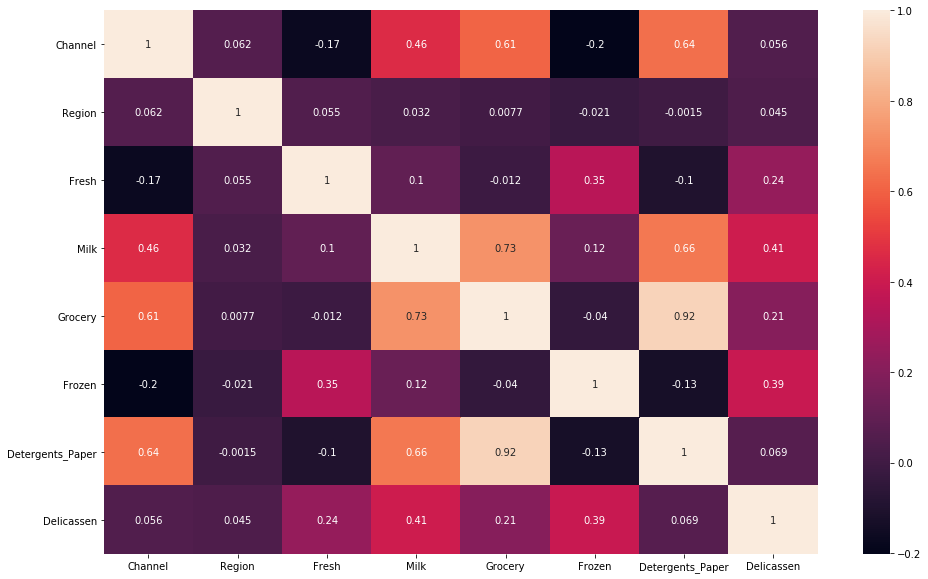

In [90]:
plt.figure(figsize= (16,10))
sns.heatmap(orginal_data.corr(),annot=True)

In [ ]:
# combining the results from the heat map and pair plot it can be seen that
# Milk has linear relationship with Detergent_paper and Grocery
# Grocery has strong relationship with Detergents_paper.

#### Building a kmeans model over the data without removing any records

In [18]:
#importing data scalars
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#importing clustering algorithm
from sklearn.cluster import KMeans



### using standard scaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(orginal_data)

In [21]:
df = pd.DataFrame(scaled_data,columns = orginal_data.columns)

In [22]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [23]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


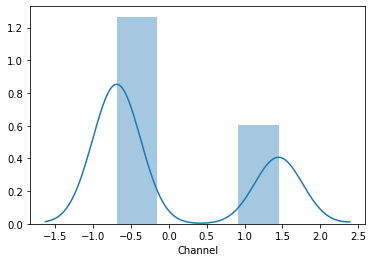

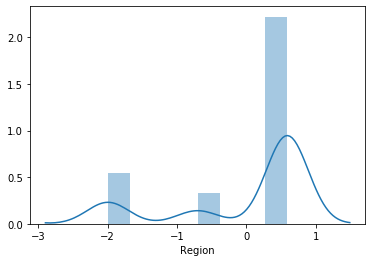

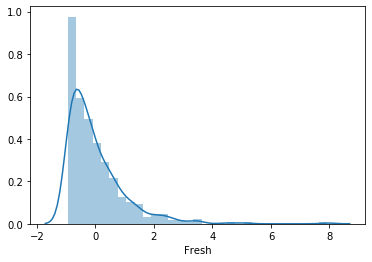

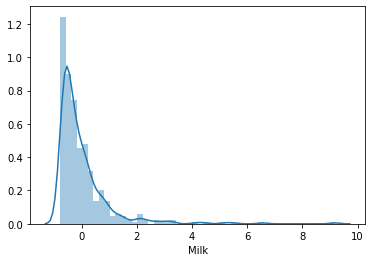

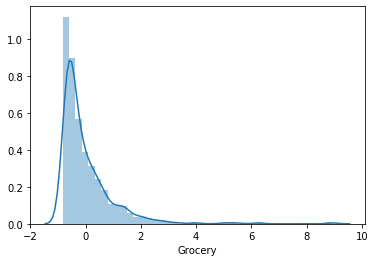

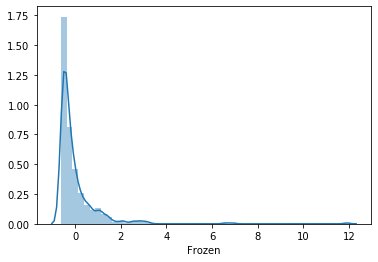

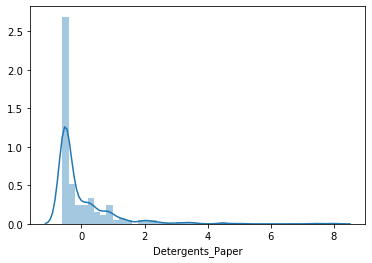

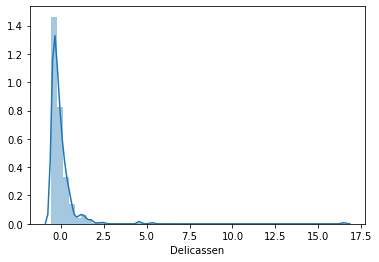

In [24]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [25]:
def approx_k_val(df,inital_val,end_val):
    from sklearn.cluster import KMeans
    k_rng = range(inital_val,end_val)
    sse = []
    for k in k_rng:
        kn = KMeans(n_clusters=k)
        kn = kn.fit(df)
        sse.append(kn.inertia_)
    plt.figure(figsize = (16,8))
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.plot(k_rng,sse,marker='o')

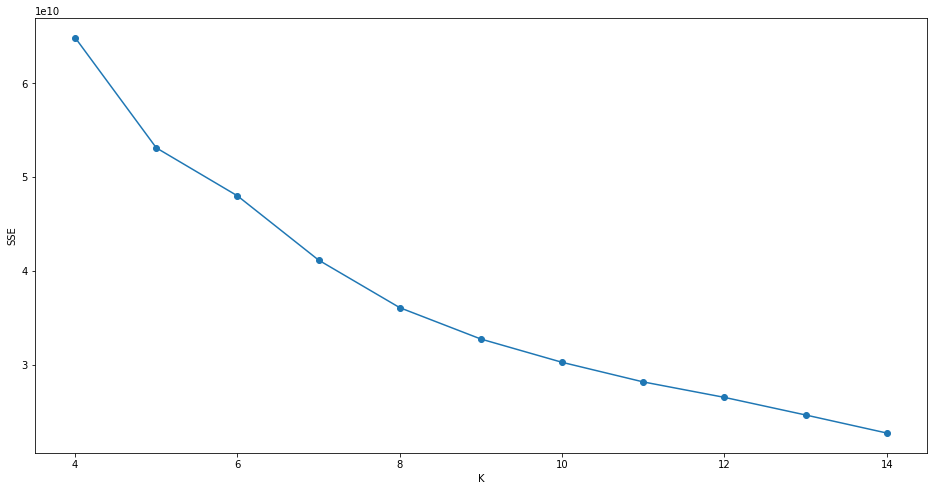

In [26]:
approx_k_val(orginal_data,4,15)

### Minmax Scaler

In [27]:
mm_scaler = MinMaxScaler()

In [28]:
scaled_data = mm_scaler.fit_transform(orginal_data)

In [29]:
mmdf = pd.DataFrame(scaled_data,columns = orginal_data.columns)

In [30]:
mmdf.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


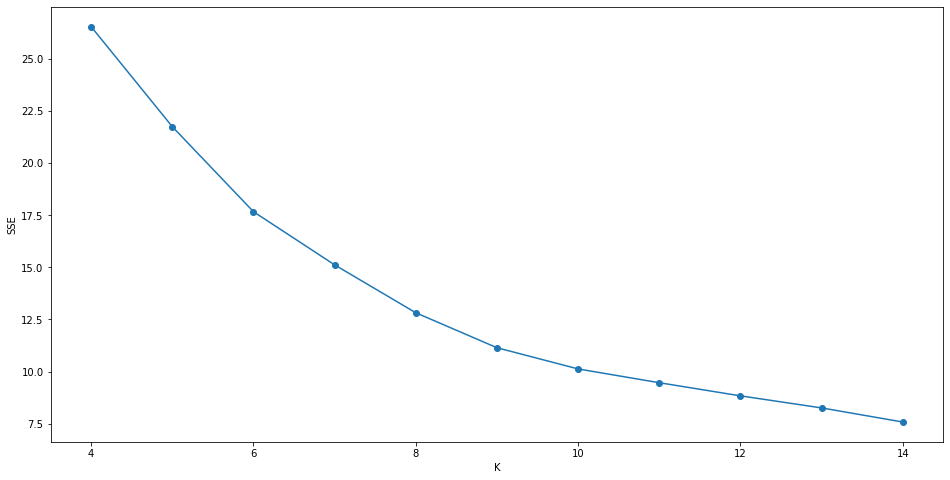

In [31]:
approx_k_val(mmdf,4,15)

### Reduced Data

In [32]:
orginal_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


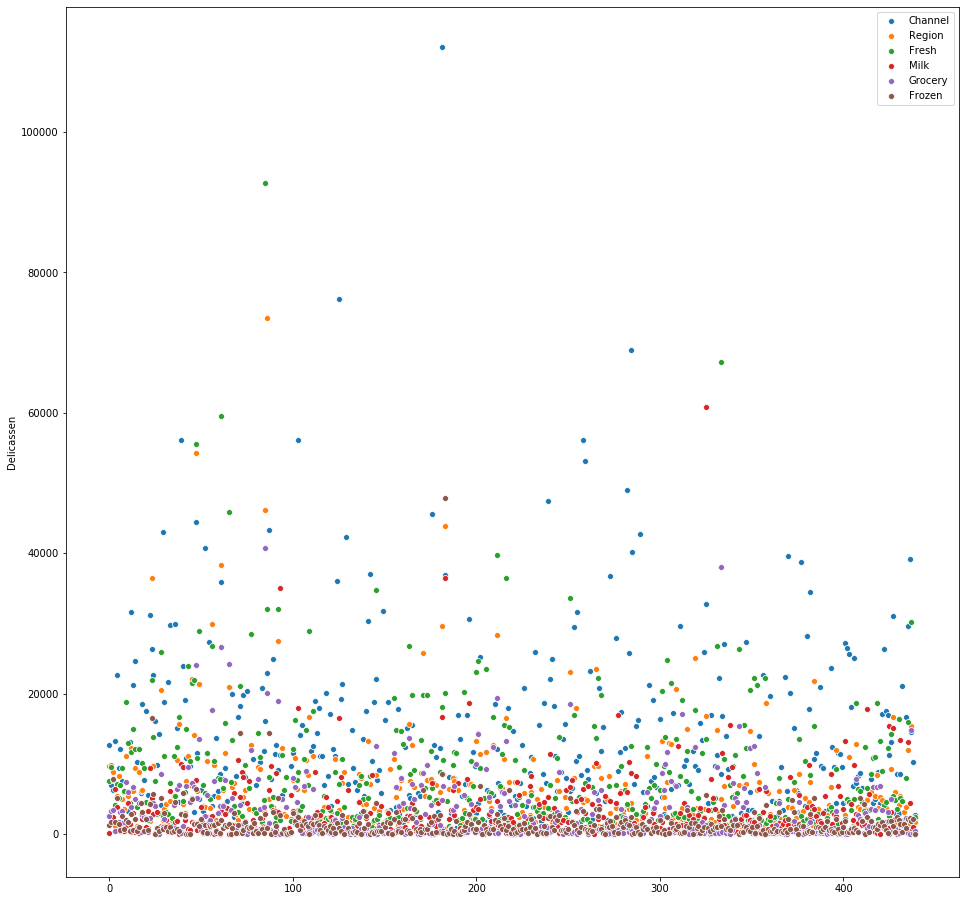

In [33]:
plt.figure(figsize=(16,16))
for i in orginal_data.columns[2:]:
    sns.scatterplot(y =orginal_data[i],x=orginal_data.index)
plt.legend(orginal_data.columns)

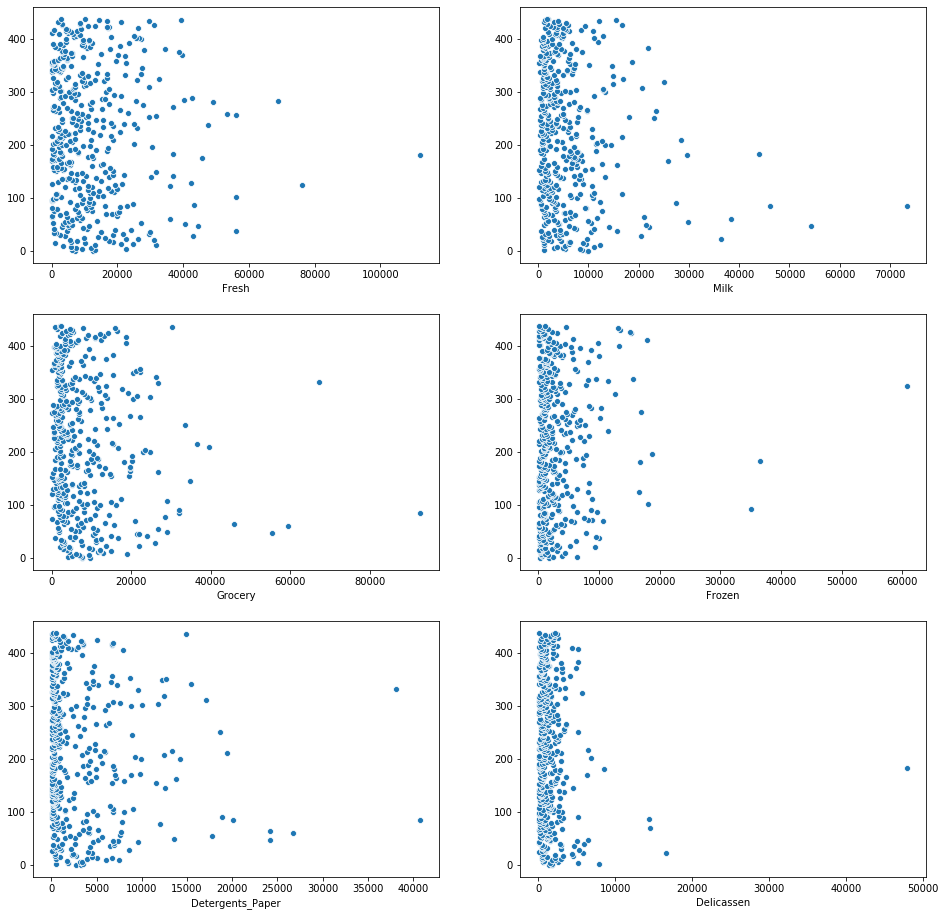

In [34]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(16,16))
for i in enumerate(products):
    plt.subplot(3,2,i[0]+1)
    sns.scatterplot(x = i[1],y=orginal_data.index,data = orginal_data)

In [35]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
scaled_data= mmdf 
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(scaled_data) 
    kmeanModel.fit(scaled_data)     
      
    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / scaled_data.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / scaled_data.shape[0] 
    mapping2[k] = kmeanModel.inertia_

In [36]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.613685118333408
2 : 0.3814339295651957
3 : 0.23754328179722495
4 : 0.19161637244210247
5 : 0.1640802365317742
6 : 0.15477654608500369
7 : 0.14157437501999118
8 : 0.12997173726933045
9 : 0.12609882538089742


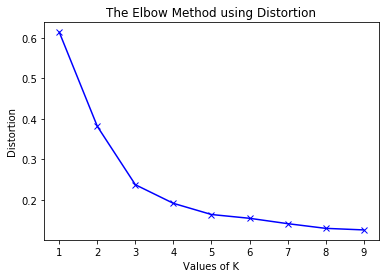

In [37]:

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

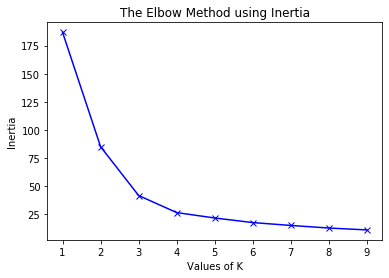

In [38]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [39]:
# bulding model with 5 clusters

In [40]:
kmeans_model = KMeans(n_clusters = 5, max_iter = 500)

In [41]:
cluster_pred = kmeans_model.fit_predict(mmdf)

In [42]:
len(cluster_pred)

440

In [43]:
cluster_data =orginal_data.copy()

In [44]:
cluster_data['cluster'] = cluster_pred

In [45]:
cluster_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


In [46]:
cluster_data['cluster'].unique()

array([2, 1, 0, 3, 4])

In [47]:
cluster_zero = cluster_data[cluster_data['cluster'] == 0]
cluster_one = cluster_data[cluster_data['cluster'] == 1]
cluster_two = cluster_data[cluster_data['cluster'] == 2]
cluster_three = cluster_data[cluster_data['cluster'] == 3]
cluster_four = cluster_data[cluster_data['cluster']== 4]

In [48]:
print('cluster zero channel mode  : ',cluster_zero['Channel'].mode().values)
print('cluster one channel mode   : ',cluster_one['Channel'].mode().values)
print('cluster two channel mode   : ',cluster_two['Channel'].mode().values)
print('cluster three channel mode : ',cluster_three['Channel'].mode().values)
print('cluster four channel mode  : ',cluster_four['Channel'].mode().values)

cluster zero channel mode  :  [1]
cluster one channel mode   :  [1]
cluster two channel mode   :  [2]
cluster three channel mode :  [2]
cluster four channel mode  :  [1]


In [49]:
print('cluster zero Region mode  : ',cluster_zero['Region'].mode().values)
print('cluster one Region mode   : ',cluster_one['Region'].mode().values)
print('cluster two Region mode   : ',cluster_two['Region'].mode().values)
print('cluster three Region mode : ',cluster_three['Region'].mode().values)
print('cluster four Region mode  : ',cluster_four['Region'].mode().values)

cluster zero Region mode  :  [1]
cluster one Region mode   :  [3]
cluster two Region mode   :  [3]
cluster three Region mode :  [2]
cluster four Region mode  :  [2]


In [61]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']

data_dict = {}
for i in cols:
    zero = round(cluster_zero[i].mean(),2)
    one =round(cluster_one[i].mean(),2)
    two = round(cluster_two[i].mean(),2)
    three = round(cluster_three[i].mean(),2)
    four = round(cluster_four[i].mean(),2)
    
    data_dict[i] = [zero,one,two,three,four]
    
    
    print('cluster zero {} mean  : {} '.format(i,zero))
    print('cluster one {} mean   : {} '.format(i,one))
    print('cluster two {} mean   : {}'.format(i,two))
    print('cluster three {} mean : {}'.format(i,three))
    print('cluster four {} mean  : {}'.format(i,four))
    print('\n')

cluster zero Fresh mean  : 12902.25 
cluster one Fresh mean   : 13878.05 
cluster two Fresh mean   : 9831.5
cluster three Fresh mean : 6273.14
cluster four Fresh mean  : 11650.54


cluster zero Milk mean  : 3870.2 
cluster one Milk mean   : 3486.98 
cluster two Milk mean   : 10981.01
cluster three Milk mean : 9965.86
cluster four Milk mean  : 2304.25


cluster zero Grocery mean  : 4026.14 
cluster one Grocery mean   : 3886.73 
cluster two Grocery mean   : 15953.81
cluster three Grocery mean : 17370.14
cluster four Grocery mean  : 4395.5


cluster zero Frozen mean  : 3127.32 
cluster one Frozen mean   : 3656.9 
cluster two Frozen mean   : 1513.2
cluster three Frozen mean : 2048.24
cluster four Frozen mean  : 5745.04


cluster zero Detergents_Paper mean  : 950.53 
cluster one Detergents_Paper mean   : 786.68 
cluster two Detergents_Paper mean   : 6899.24
cluster three Detergents_Paper mean : 8320.27
cluster four Detergents_Paper mean  : 482.71


cluster zero Delicassen mean  : 1197.15 
c

In [62]:
data_dict

{'Fresh': [12902.25, 13878.05, 9831.5, 6273.14, 11650.54],
 'Milk': [3870.2, 3486.98, 10981.01, 9965.86, 2304.25],
 'Grocery': [4026.14, 3886.73, 15953.81, 17370.14, 4395.5],
 'Frozen': [3127.32, 3656.9, 1513.2, 2048.24, 5745.04],
 'Detergents_Paper': [950.53, 786.68, 6899.24, 8320.27, 482.71],
 'Delicassen': [1197.15, 1518.28, 1826.21, 1546.92, 1105.89]}

In [64]:
data_dict.keys()

dict_keys(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [66]:
con_df = pd.DataFrame(data_dict)

In [67]:
con_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12902.25,3870.20,4026.14,3127.32,950.53,1197.15
1,13878.05,3486.98,3886.73,3656.90,786.68,1518.28
2,9831.50,10981.01,15953.81,1513.20,6899.24,1826.21
3,6273.14,9965.86,17370.14,2048.24,8320.27,1546.92
4,11650.54,2304.25,4395.50,5745.04,482.71,1105.89


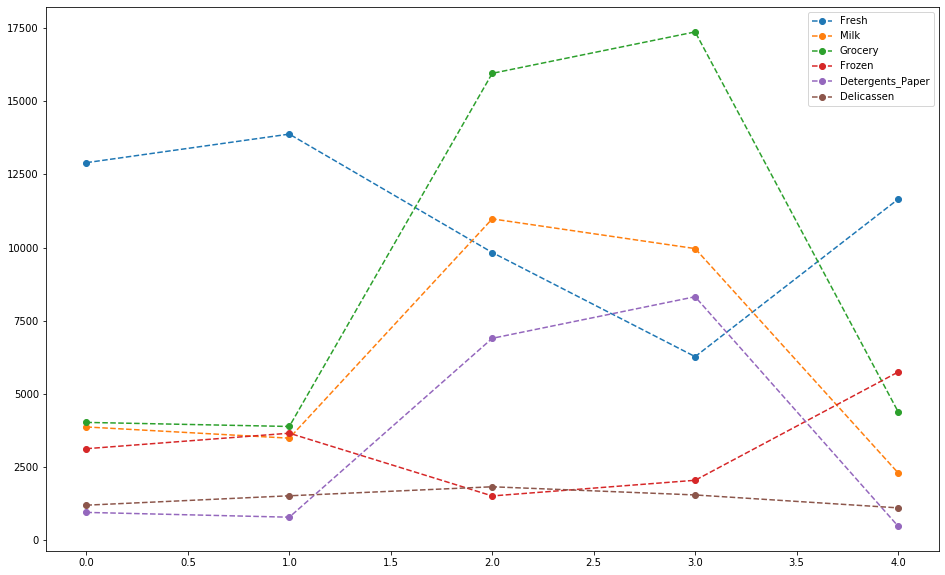

In [88]:
plt.figure(figsize=(16,10))
plt.plot(con_df.index,con_df.values,'o--')
plt.legend(con_df.columns)
plt.show()